# Multiple Linear Regression — Lab Practice (Automobile Battery Sales)


**Goal:** Build and interpret a multiple linear regression (MLR) model using a CSV file.  
**Data file:** `battery_sales_practice.csv` (each row = one region).

**Target (Y):** `BatterySales_week`  
**Predictors (X):** `Vehicles_thousands`, `ColdIndex_days`, `Advertising_k`, `Shops`, `MedianIncome_k`


## 0) Setup

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson


## 1) Load the CSV

In [4]:
import pandas as pd
from io import StringIO

csv_text = """RegionID,BatterySales_week,Vehicles_thousands,ColdIndex_days,Advertising_k,Shops,MedianIncome_k
1,115.75,11.68,14.81,9.77,18,39.38
2,214.57,45.39,9.92,25.88,33,57.75
3,188.89,36.92,13.24,20.48,23,62.29
4,170.56,28.06,24.42,17.98,11,46.67
5,94.51,10.0,0.0,14.91,12,59.12
6,239.55,56.48,7.59,36.93,22,61.56
7,177.66,33.6,20.21,11.37,18,40.8
8,199.9,49.0,3.47,19.7,22,55.48
9,259.07,55.53,20.3,29.35,33,61.63
10,220.38,49.38,8.6,43.64,26,42.29
11,179.04,42.03,7.32,26.5,12,41.54
12,242.0,54.88,10.45,37.98,30,47.86
13,208.04,52.8,13.38,17.97,30,32.47
14,204.4,53.99,9.27,25.55,17,51.27
15,149.12,20.23,24.16,26.09,18,47.58
16,170.58,39.11,9.12,31.48,11,50.27
17,184.56,34.84,21.57,20.67,15,32.21
18,316.45,80.0,20.8,37.47,36,36.33
19,166.83,35.03,10.39,22.08,21,50.22
20,280.02,63.86,23.18,36.62,31,56.02
21,161.21,19.78,26.78,19.25,20,49.95
22,193.76,39.01,17.27,23.47,25,45.0
23,143.1,23.51,19.12,22.46,14,29.48
24,211.76,47.89,0.0,44.16,29,55.7
25,282.01,72.2,16.88,27.66,29,46.8
26,168.53,31.62,21.06,16.03,16,30.55
27,261.88,56.84,26.89,24.88,28,57.21
28,248.53,56.62,8.64,27.76,35,39.14
29,239.28,54.6,13.94,24.29,28,58.56
30,204.33,41.61,21.87,9.22,25,37.59
31,184.12,42.67,6.71,26.07,21,54.13
32,220.2,47.04,17.33,20.64,18,53.86
33,190.91,48.11,0.0,14.12,29,59.57
34,214.33,47.35,17.03,16.9,27,44.59
35,195.99,56.69,0.0,20.72,28,61.71
36,149.44,43.1,0.0,14.9,9,39.05
37,211.91,53.2,9.5,23.88,21,35.56
38,213.59,49.57,8.04,32.41,32,43.79
39,156.44,28.17,12.0,20.06,21,51.27
40,143.11,31.26,0.0,16.57,23,53.79
41,238.94,53.51,3.38,35.82,31,56.35
42,239.29,52.27,26.61,22.74,27,49.66
43,239.21,61.24,11.97,26.58,31,45.0
44,98.1,11.48,3.51,6.94,17,50.6
45,221.86,54.21,17.73,25.62,22,41.73
46,110.34,10.0,10.15,14.89,15,32.44
47,196.9,44.16,18.3,14.27,26,49.72
48,86.29,10.0,9.26,6.98,5,36.8
49,285.67,65.22,27.25,44.0,32,37.52
50,164.65,32.12,13.57,12.97,21,45.08
51,313.2,77.62,14.8,37.03,38,59.95
52,185.91,48.15,0.0,23.74,22,51.57
53,231.41,57.65,4.42,28.13,22,46.76
54,244.9,53.6,20.4,25.42,22,48.6
55,270.34,71.96,5.23,29.08,35,67.51
56,207.82,44.56,19.62,24.7,18,40.29
57,135.88,27.87,0.0,18.7,23,52.98
58,166.09,27.21,11.03,23.06,17,40.19
59,188.03,31.24,18.82,33.52,10,42.29
60,214.24,45.79,12.71,22.14,27,54.89
"""

df = pd.read_csv(StringIO(csv_text))


## 2) Quick data check

In [5]:

display(df.info())
# df.describe(include="all")
# Preview the first rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RegionID            60 non-null     int64  
 1   BatterySales_week   60 non-null     float64
 2   Vehicles_thousands  60 non-null     float64
 3   ColdIndex_days      60 non-null     float64
 4   Advertising_k       60 non-null     float64
 5   Shops               60 non-null     int64  
 6   MedianIncome_k      60 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 3.4 KB


None

,RegionID,BatterySales_week,Vehicles_thousands,ColdIndex_days,Advertising_k,Shops,MedianIncome_k
0,1,115.75,11.68,14.81,9.77,18,39.38
1,2,214.57,45.39,9.92,25.88,33,57.75
2,3,188.89,36.92,13.24,20.48,23,62.29
3,4,170.56,28.06,24.42,17.98,11,46.67
4,5,94.51,10.00,0.00,14.91,12,59.12


## 3) Visuals: Y vs each X

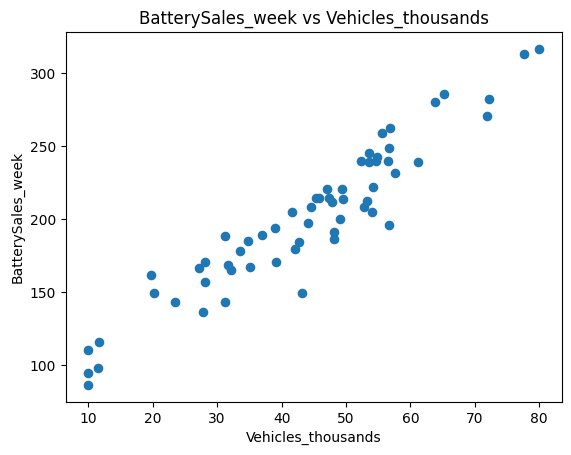

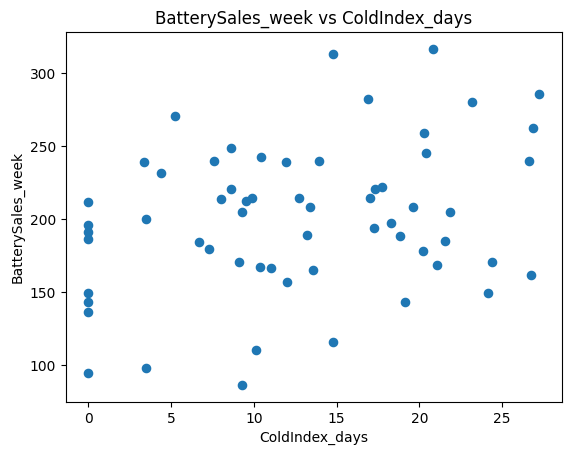

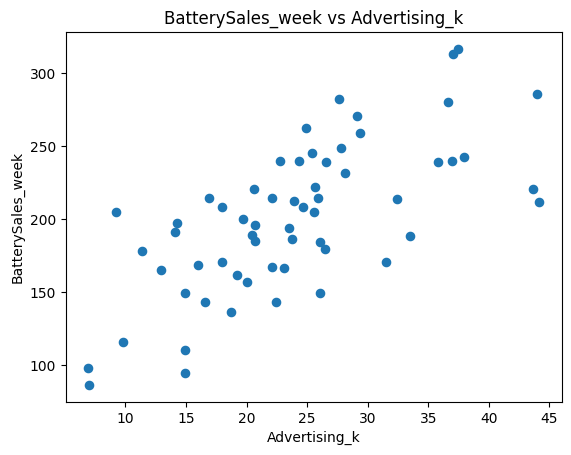

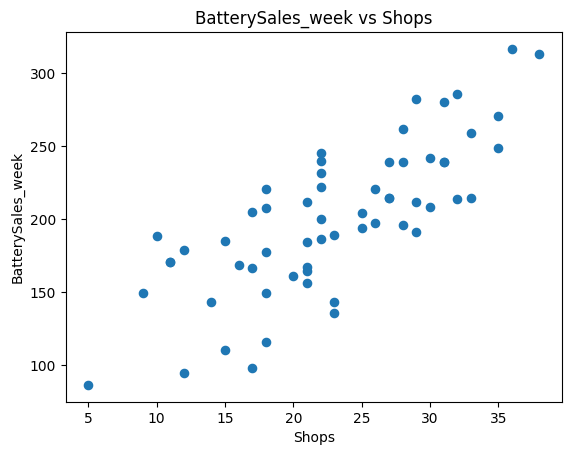

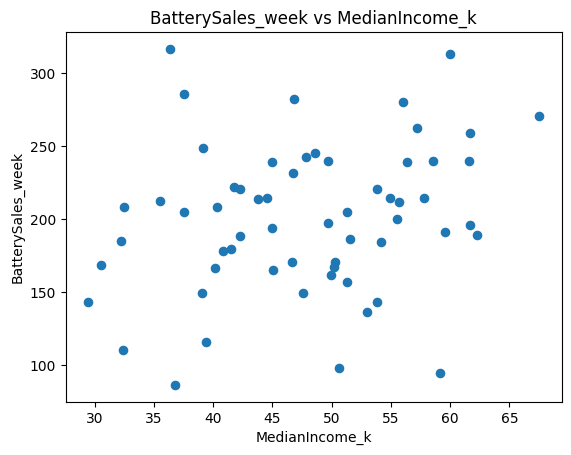

In [6]:

target = "BatterySales_week"
predictors = ["Vehicles_thousands", "ColdIndex_days", "Advertising_k", "Shops", "MedianIncome_k"]

for col in predictors:
    plt.figure()
    plt.scatter(df[col], df[target], s=35)
    plt.xlabel(col); plt.ylabel(target)
    plt.title(f"{target} vs {col}")
    plt.show()


## 4) Fit the MLR model + Coefficients analysis + Model fit + Residual tests

In [23]:

X = sm.add_constant(df[predictors])
y = df[target]
mlr = sm.OLS(y, X).fit()
print(mlr.summary())


formula_str = "BatterySales_week ~ Vehicles_thousands  ColdIndex_days + Advertising_k + MedianIncome_k"
result_multi = smf.ols(formula=formula_str, data=df).fit()
print(result_multi.summary())

formula_str = "BatterySales_week ~ Vehicles_thousands * ColdIndex_days + Advertising_k + MedianIncome_k"
result_multi = smf.ols(formula=formula_str, data=df).fit()
print(result_multi.summary())

# b = mlr.params
# print("Fitted MLR equation:")
# print(f"{target} = "
#       f"{b['const']:.3f} + "
#       f"{b['Vehicles_thousands']:.3f}*Vehicles_thousands + "
#       f"{b['ColdIndex_days']:.3f}*ColdIndex_days + "
#       f"{b['Advertising_k']:.3f}*Advertising_k + "
#       f"{b['Shops']:.3f}*Shops + "
#       f"{b['MedianIncome_k']:.3f}*MedianIncome_k")

# coef_table = pd.DataFrame({
#     "term": mlr.params.index,
#     "estimate": mlr.params.values,
#     "std_error": mlr.bse.values,
#     "t_value": mlr.tvalues.values,
#     "p_value": mlr.pvalues.values
# })
# coef_table


                            OLS Regression Results                            
Dep. Variable:      BatterySales_week   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     558.5
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           3.54e-45
Time:                        21:52:19   Log-Likelihood:                -201.60
No. Observations:                  60   AIC:                             415.2
Df Residuals:                      54   BIC:                             427.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 27.9523      6

## 6) Compare models

In [13]:

X_base = sm.add_constant(df[["Vehicles_thousands", "ColdIndex_days"]])
base = sm.OLS(y, X_base).fit()

print(base.summary())



                            OLS Regression Results                            
Dep. Variable:      BatterySales_week   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           3.11e-39
Time:                        21:41:10   Log-Likelihood:                -227.21
No. Observations:                  60   AIC:                             460.4
Df Residuals:                      57   BIC:                             466.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 55.8810      4

## 7) Residual diagnostics

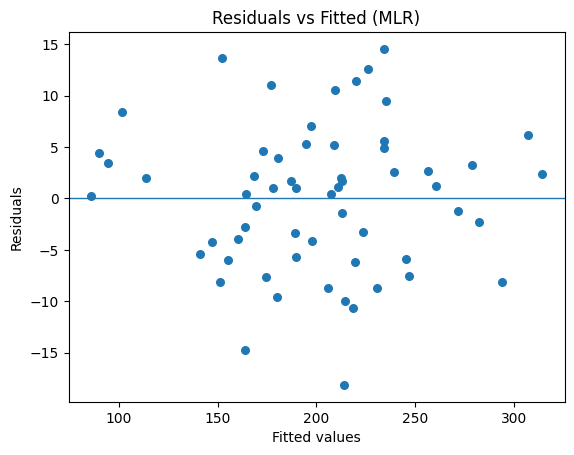

In [19]:

fitted = mlr.fittedvalues
resid = mlr.resid

plt.figure()
plt.scatter(fitted, resid, s=30)
plt.axhline(0, linewidth=1)
plt.xlabel("Fitted values"); plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (MLR)"); plt.show()


## 8) Multicollinearity (VIF)

In [20]:

X_vif = df[predictors].values
vif_vals = [variance_inflation_factor(X_vif, i) for i in range(X_vif.shape[1])]
pd.DataFrame({"predictor": predictors, "VIF": np.round(vif_vals, 2)})


,predictor,VIF
0,Vehicles_thousands,23.03
1,ColdIndex_days,3.08
2,Advertising_k,13.61
3,Shops,25.16
4,MedianIncome_k,12.96


## 9) Predict a new market

In [21]:

new_market = pd.DataFrame([{
    "Vehicles_thousands": 55,
    "ColdIndex_days": 18,
    "Advertising_k": 30,
    "Shops": 35,
    "MedianIncome_k": 52
}])


# Make sure a constant is added, no guessing
X_new = sm.add_constant(new_market, has_constant='add')

# Reorder/align to the columns the model expects
X_new = X_new[mlr.model.exog_names]

pred = mlr.predict(X_new)
float(pred)


/tmp/ipykernel_1815965/2663137397.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(pred)


251.15137317034075

## 10) Exercises


1. Remove one predictor with the highest VIF and re-fit. What changes in AIC/BIC and R²?  So: dropping Shops slightly worsens fit and clearly worsens AIC/BIC, but it helps with the multicollinearity issue (it was the highest VIF variable).
2. Add an interaction `Vehicles_thousands * ColdIndex_days`. Does the model improve?   Answer: No, the interaction does not improve the model. Fit is slightly worse (lower Adj R², higher AIC/BIC), the interaction is not statistically significant, and it explodes the condition number (very serious multicollinearity).
3. Write the final model equation and briefly interpret each coefficient in plain English.  BatterySales_week=28.65+2.51⋅Vehicles_thousands+1.69⋅ColdIndex_days+0.84⋅Advertising_k+0.43⋅MedianIncome_k. Plain-English interpretation (each coefficient):

Intercept (28.65) – Predicted weekly battery sales when all predictors are 0. It’s mainly a baseline; not very meaningful by itself, but needed for the line.

Vehicles_thousands (2.51) – Holding cold days, advertising and income fixed, each extra 1000 vehicles in the region is associated with about 2.5 more batteries sold per week.

ColdIndex_days (1.69) – For each additional cold day per year, with other variables fixed, weekly battery sales increase by about 1.7 batteries on average.

Advertising_k (0.84) – For each additional 1k of advertising spend, holding other variables constant, weekly battery sales rise by about 0.84 batteries.

MedianIncome_k (0.43) – For each extra 1k in median income, keeping vehicles, cold days and advertising fixed, weekly sales increase by about 0.43 batteries.
